In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df.job_skills.apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head()

/opt/anaconda3/envs/python_data_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [2]:
df_DA_skill_exploded = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy().explode("job_skills")
df_DA_skill_exploded = df_DA_skill_exploded.dropna(subset="salary_year_avg")
df_DA_skill_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"


In [3]:
#df_skills_demanded = 
df_skills_demanded = df_DA_skill_exploded.groupby("job_skills")["salary_year_avg"].agg(["median", "count"])

In [4]:
df_most_asked_skills = df_skills_demanded.sort_values("count", ascending=False).head(10).sort_values("median", ascending=False)
df_most_paid_skills = df_skills_demanded.sort_values("median", ascending=False).head(10)

In [5]:
df_most_asked_skills

,median,count
job_skills,,
python,97500.00,1431
tableau,92875.00,1364
r,92500.00,893
sql server,92500.00,286
sql,91000.00,2508
sas,90000.00,926
power bi,90000.00,838
powerpoint,85000.00,462
excel,84392.00,1808


In [6]:
df_most_paid_skills

,median,count
job_skills,,
dplyr,196250.0,2
bitbucket,189000.0,3
gitlab,186000.0,3
solidity,179000.0,1
hugging face,175000.0,1
couchbase,160515.0,1
ansible,159640.0,1
mxnet,149000.0,2
cassandra,148250.0,6


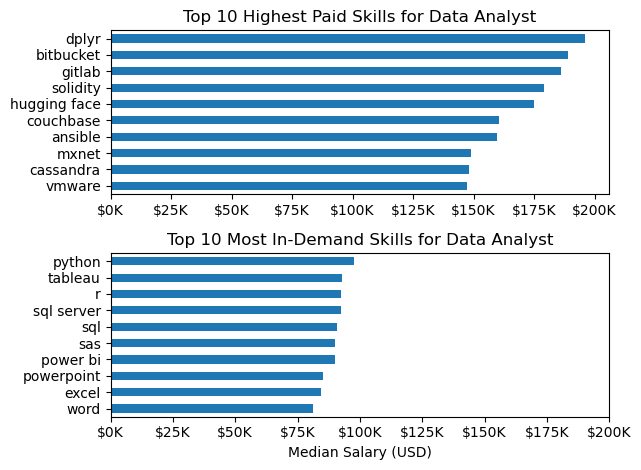

In [7]:
fig, ax = plt.subplots(2, 1)

df_most_paid_skills.plot(
  kind="barh",
  y="median",
  ylabel="",
  xlabel="",
  title="Top 10 Highest Paid Skills for Data Analyst",
  legend=False,
  ax=ax[0]
)

df_most_asked_skills.plot(
  kind="barh",
  y="median",
  ylabel="",
  xlabel="Median Salary (USD)",
  title="Top 10 Most In-Demand Skills for Data Analyst",
  legend=False,
  ax=ax[1]
)

ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda salary, pos: f"${int(salary/1000)}K"))

ax[1].invert_yaxis()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda salary, pos: f"${int(salary/1000)}K"))

plt.tight_layout()
plt.xlim(0, 200000)
plt.show()

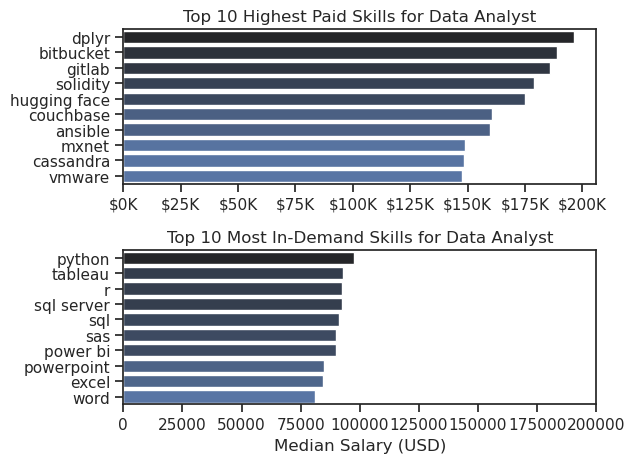

In [18]:
import seaborn as sns
fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")

sns.barplot(
  df_most_paid_skills, 
  x="median", 
  y=df_most_paid_skills.index, 
  ax=ax[0], 
  hue="median", 
  palette="dark:b_r", 
  legend=False
)
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda salary, pos: f"${int(salary/1000)}K"))

# df_most_paid_skills.plot(
#   kind="barh",
#   y="median",
#   ylabel="",
#   xlabel="",
#   title="Top 10 Highest Paid Skills for Data Analyst",
#   legend=False,
#   ax=ax[0]
# )

sns.barplot(
  df_most_asked_skills,
  x="median",
  y=df_most_asked_skills.index,
  ax=ax[1],
  hue="median",
  palette="dark:b_r",
  legend=False
)
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_ylabel("")
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analyst")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda salary, pos: f"${int(salary/1000)}K"))

# df_most_asked_skills.plot(
#   kind="barh",
#   y="median",
#   ylabel="",
#   xlabel="Median Salary (USD)",
#   title="Top 10 Most In-Demand Skills for Data Analyst",
#   legend=False,
#   ax=ax[1]
# )

plt.tight_layout()
plt.xlim(0, 200000)
plt.show()

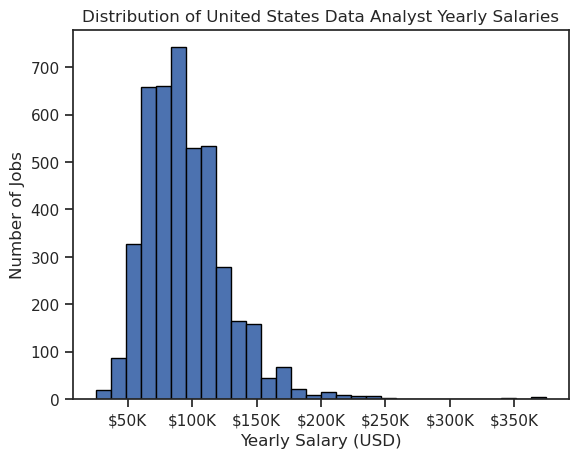

In [19]:
# Replace the historgram with seaborn
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

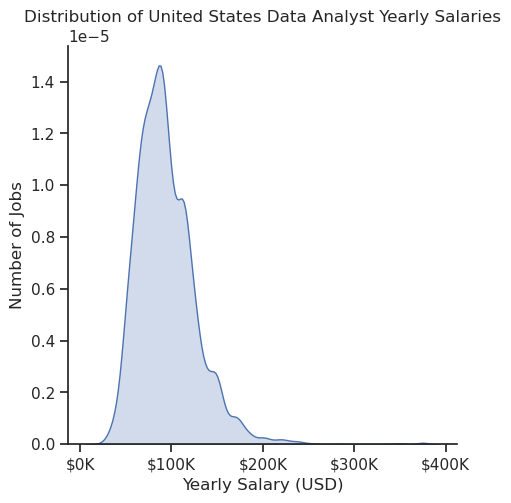

In [21]:
sns.displot(
  data=df_DA_US['salary_year_avg'],
  kind="kde",
  fill=True,
  common_norm=False
)

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

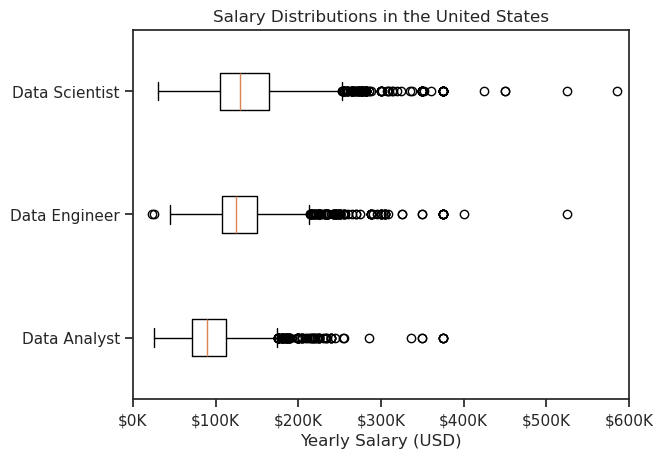

In [23]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


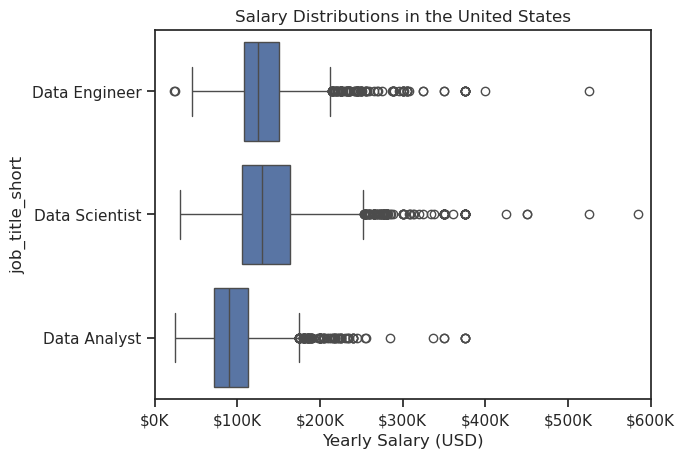

In [25]:
sns.boxplot(
  data=df_US,
  x="salary_year_avg",
  y="job_title_short"
)

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [26]:
df.company_name.value_counts().head(10)

company_name
Emprego                6664
Booz Allen Hamilton    2879
Dice                   2827
Harnham                2547
Insight Global         2254
Citi                   2164
Confidenziale          2040
Listopro               1984
Capital One            1946
Walmart                1863
Name: count, dtype: int64

In [40]:
top_companies = df.company_name.value_counts().head(10).copy()
top_companies = top_companies.reset_index(name="job_count")
top_companies

,company_name,job_count
0,Emprego,6664
1,Booz Allen Hamilton,2879
2,Dice,2827
3,Harnham,2547
4,Insight Global,2254
5,Citi,2164
6,Confidenziale,2040
7,Listopro,1984
8,Capital One,1946
9,Walmart,1863


<Axes: xlabel='job_count', ylabel='company_name'>

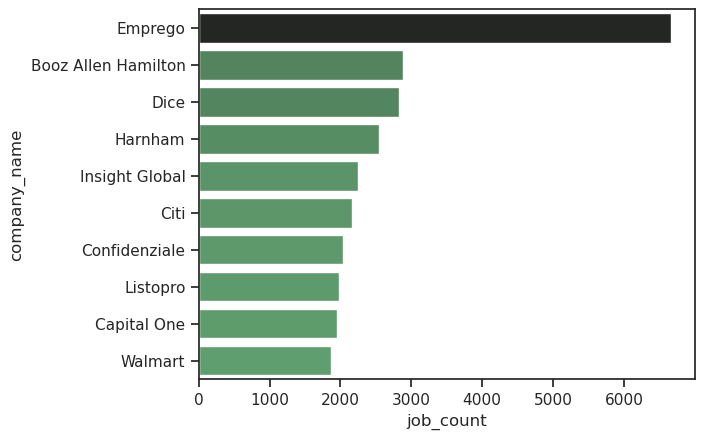

In [41]:
sns.barplot(top_companies, x="job_count", y="company_name", hue="job_count", palette="dark:g_r", legend=False)

In [ ]:
df_DS = df[(df["job_title_short"] == "Data Scientist") & (df["salary_year_avg"].notna())].copy()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"[gdpr, excel]","{'analyst_tools': ['excel'], 'libraries': ['gd..."
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
212,Data Scientist,NATOIS-0008 Data Scientist (NS) - TUE 13 Jun,"Brussels, Belgium",via Ai-Jobs.net,Full-time,False,Belgium,2023-06-05 13:56:28,False,False,Belgium,year,157500.0,NaN,"EMW, Inc.","[c, r, sql, python, aws, azure, hadoop, tableau]","{'analyst_tools': ['tableau'], 'cloud': ['aws'..."
257,Data Scientist,Senior Bioinformatics Research Scientist- Data...,"Brighton, TN",via Work RN,Full-time,False,Georgia,2023-11-20 13:40:09,False,False,United States,year,103128.0,NaN,St. Jude Children's Research Hospital,"[r, electron]","{'libraries': ['electron'], 'programming': ['r']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785488,Data Scientist,Data Scientist,"New York, NY",via BeBee,Full-time,False,"New York, United States",2023-11-27 06:01:23,False,False,United States,year,115000.0,NaN,Winston Fox,"[python, r]","{'programming': ['python', 'r']}"
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"[python, hadoop, spark, airflow, kubernetes]","{'libraries': ['hadoop', 'spark', 'airflow'], ..."


(0.0, 500000.0)

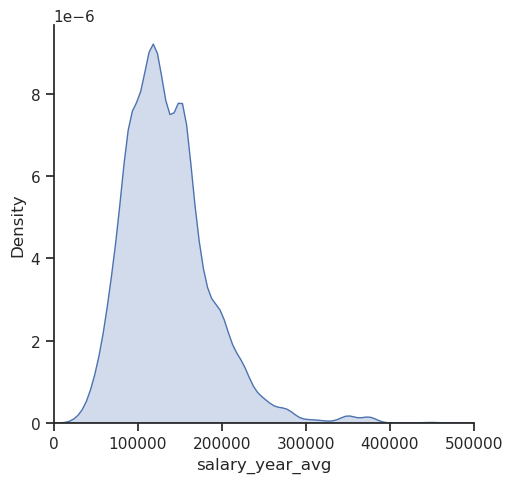

In [82]:
sns.displot(df_DS["salary_year_avg"], kind="kde", fill=True)
plt.xlim(0, 500000)

In [62]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_role_salaries = df[df["salary_year_avg"].notna()].copy()
df_role_salaries = [df_role_salaries[df_role_salaries["job_title_short"] == title] for title in job_titles]
df_role_salaries[0]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"
784423,Data Analyst,Sales Data Analyst,"Juriquilla, Qro., Mexico",via Ai-Jobs.net,Full-time,False,Mexico,2023-01-05 06:43:20,False,False,Mexico,year,80850.0,NaN,Charger Logistics Inc,"[tableau, power bi]","{'analyst_tools': ['tableau', 'power bi']}"
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,"[sql, vba, tableau, excel, alteryx]","{'analyst_tools': ['tableau', 'excel', 'altery..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,"[sql, python, r, looker]","{'analyst_tools': ['looker'], 'programming': [..."


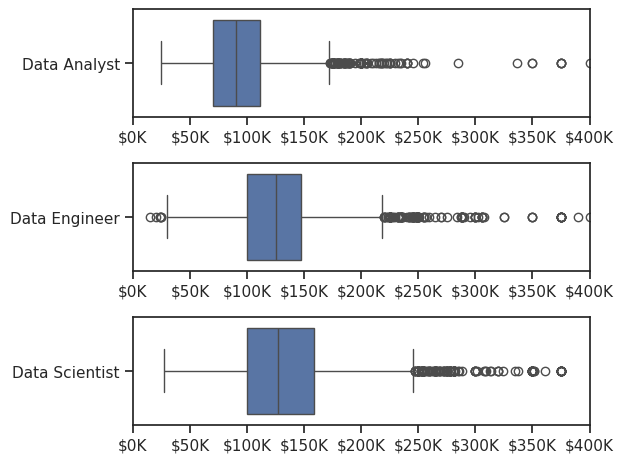

In [ ]:
fig, ax = plt.subplots(3,1)

for i, title in enumerate(job_titles):
  sns.boxplot(df_role_salaries[i], x="salary_year_avg", y="job_title_short", ax=ax[i])
  ax[i].set_ylabel("")
  ax[i].set_xlabel("")
  ax[i].set_xlim(0, 400000)
  ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.tight_layout()